In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df.Age = df.Age.fillna(df.Age.mean())

In [ ]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
df.drop('Sex',axis='columns',inplace=True)

In [ ]:
x = df.drop('Survived',axis='columns')

In [ ]:
y=df.Survived

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
x_test

,Pclass,Age,Fare
113,3,20.0,9.8250
144,2,18.0,11.5000
463,2,48.0,13.0000
15,2,55.0,16.0000
513,1,54.0,59.4000
...,...,...,...
872,1,33.0,5.0000
443,2,28.0,13.0000
265,2,36.0,10.5000
871,1,47.0,52.5542


In [ ]:
y_test

113    0
144    0
463    0
15     1
513    1
      ..
872    0
443    1
265    0
871    1
698    0
Name: Survived, Length: 179, dtype: int64

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.6871508379888268

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[97, 19],
       [37, 26]])

<Axes: >

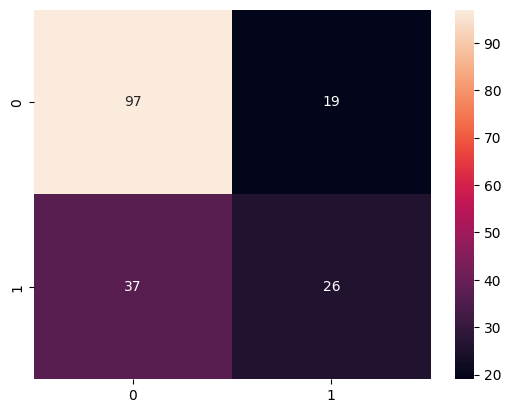

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [ ]:
model.predict_proba(x_test)

array([[8.57863309e-01, 1.42136691e-01],
       [7.16997708e-01, 2.83002292e-01],
       [7.66220553e-01, 2.33779447e-01],
       [7.57176968e-01, 2.42823032e-01],
       [2.65276743e-01, 7.34723257e-01],
       [8.74424715e-01, 1.25575285e-01],
       [6.72878843e-01, 3.27121157e-01],
       [8.74468380e-01, 1.25531620e-01],
       [7.38007732e-01, 2.61992268e-01],
       [3.18475071e-01, 6.81524929e-01],
       [2.31644529e-02, 9.76835547e-01],
       [8.82752406e-01, 1.17247594e-01],
       [8.74419900e-01, 1.25580100e-01],
       [2.94220915e-01, 7.05779085e-01],
       [4.99778428e-01, 5.00221572e-01],
       [8.82895152e-01, 1.17104848e-01],
       [8.74468380e-01, 1.25531620e-01],
       [8.74221049e-01, 1.25778951e-01],
       [8.77979697e-01, 1.22020303e-01],
       [8.74381670e-01, 1.25618330e-01],
       [8.61763793e-01, 1.38236207e-01],
       [8.74392904e-01, 1.25607096e-01],
       [8.42762442e-01, 1.57237558e-01],
       [7.54782671e-01, 2.45217329e-01],
       [4.244292